In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
dados = pd.read_csv('dados_org (1).csv')

In [32]:
dados.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'welcome_call', 'welcome_pack', 'idade',
       'genero', 'doacoes', 'valor', 'meio_pagamento', 'churn'],
      dtype='object')

In [0]:
dados = dados.dropna()

In [0]:
dados.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

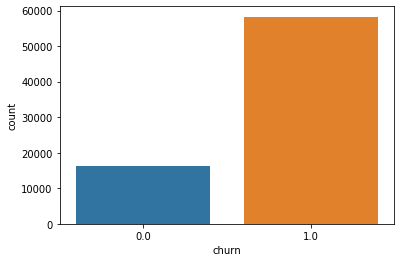

In [35]:
sns.countplot(dados['churn'])

In [0]:
!pip install imblearn
# técnica para balancear dados e preencher NaN's
# por Knn ele cria uma região e alimenta os churn 0 para balancear a quantidade de registros
# proximidade de caracteristicas balanceando a análise
# tambem preenche os dados vazios com NaN de forma que seja coerente com eixo x e y e seus devidos clusters

In [0]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split

In [0]:
X =  pd.get_dummies(data=dados.drop('churn', axis=1),
                    columns=['welcome_call', 'welcome_pack', 'genero', 'meio_pagamento']
                    )
y= dados['churn']

In [0]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y)

In [0]:
ada = ADASYN(sampling_strategy='minority')
X_res, y_res = ada.fit_resample(X_treino, y_treino)

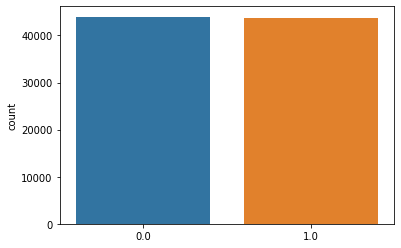

In [41]:
sns.countplot(y_res)

In [0]:
from sklearn.neural_network import MLPClassifier
modelo = MLPClassifier()

In [0]:
modelo.fit(X_res, y_res)

In [0]:
from sklearn.metrics import classification_report

In [0]:
print(classification_report(y_teste, y_pred))

In [0]:
y_pred = modelo.predict(X_teste)